In [1]:
import pandas as pd
import os
import pickle
import glob
from auxiliary import *

In [2]:
%matplotlib inline

Threshold (wavelength and SNR):

      412.000       1500.0000
      443.000       1407.7380
      490.000       1267.8572
      510.000       1208.3334
      555.000       1074.4048
      670.000       732.14282
      765.000       500.00000
      865.000       500.00000

Baseline (wavelength and SNR):

      412.000       1500.0000
      443.000       1436.2140
      490.000       1339.5062
      510.000       1298.3539
      555.000       1205.7614
      670.000       1400.0000
      765.000       600.00000
      865.000       600.00000


In [3]:
# set up data stream
SNRs = ['baseline','threshold']
mainDir = '/accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY'
subDirs = ['DATA/Pace_170207/%s' % SNR for SNR in SNRs]

In [4]:
filePattern = 'S20031932003196.L3b_4D*'

In [5]:
filePattern = 'S20031932003196.L3b_4D*'
fileList = [glob.glob(os.path.join(mainDir, subDir,
                                   filePattern))[0] for subDir in subDirs]

In [6]:
simDict = {snr:file for snr,file in zip(SNRs, fileList)}

In [7]:
ptiles = ['50', '70', '80', '90', '95']
rhoUncPtileDict = dict.fromkeys(SNRs)
for snr in SNRs:
    rhoUncPtileDict[snr] = dict.fromkeys(ptiles)
    # Get data needed in form of a dict
    if simDict[snr]:
        print('processing %s' % simDict[snr])
        _, rhoUncDict,_ = GetDataDicts(fp=simDict[snr])
        for ptile in ptiles:
            rhoUncPtileDict[snr][ptile] = GetPtileDict(rhoUncDict, ptile=int(ptile)/100)

processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/Pace_170207/baseline/S20031932003196.L3b_4D_SU51.nc
processing /accounts/ekarakoy/DEV-ALL/UNCERTAINTIES/UNCPY/UNC_notebooks/SNR_SENSITIVITY/DATA/Pace_170207/threshold/S20031932003196.L3b_4D_SU52.nc


In [8]:
# Now I need to plot these percentiles for each NIR SNR Scenarios:
pn = pd.Panel(rhoUncPtileDict)

In [9]:
pn['baseline']

,50,70,80,90,95
412,0.000530,0.000619,0.000697,0.000820,0.000924
443,0.000448,0.000518,0.000581,0.000685,0.000775
490,0.000364,0.000415,0.000460,0.000534,0.000600
510,0.000339,0.000381,0.000421,0.000484,0.000542
555,0.000268,0.000300,0.000327,0.000377,0.000424
670,0.000117,0.000132,0.000146,0.000172,0.000195


In [10]:
pn['threshold']antti.a.pulkkinen@nasa.govronald.s.zellar@nasa.gov

,50,70,80,90,95
412,0.000628,0.000728,0.000816,0.000955,0.001074
443,0.000534,0.000610,0.000683,0.000800,0.000905
490,0.000434,0.000490,0.000543,0.000628,0.000704
510,0.000402,0.000452,0.000496,0.000571,0.000637
555,0.000320,0.000355,0.000390,0.000446,0.000500
670,0.000145,0.000163,0.000182,0.000214,0.000242


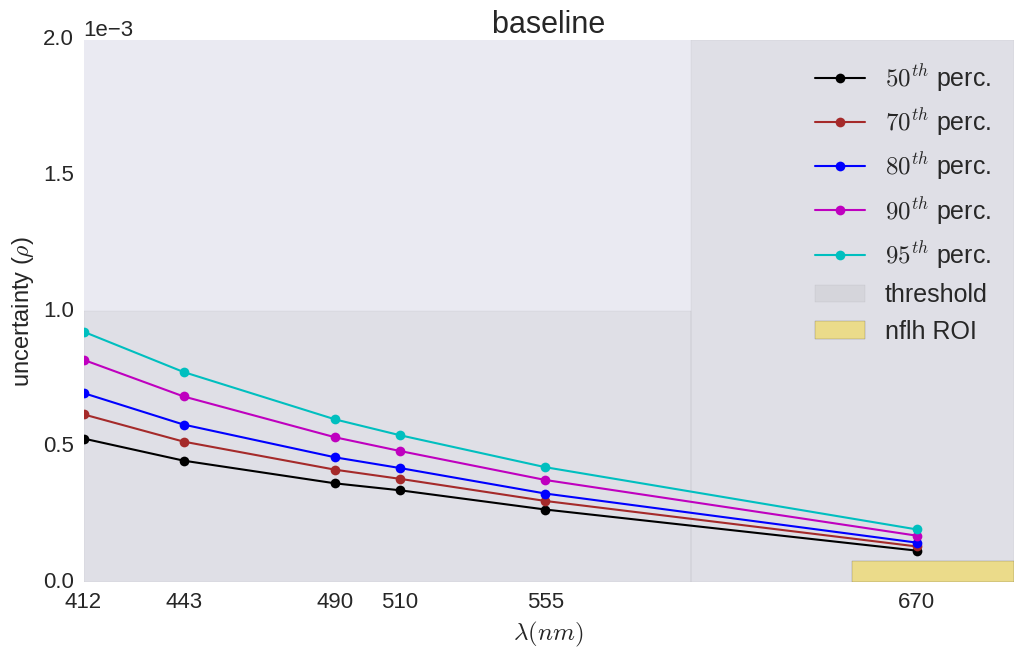

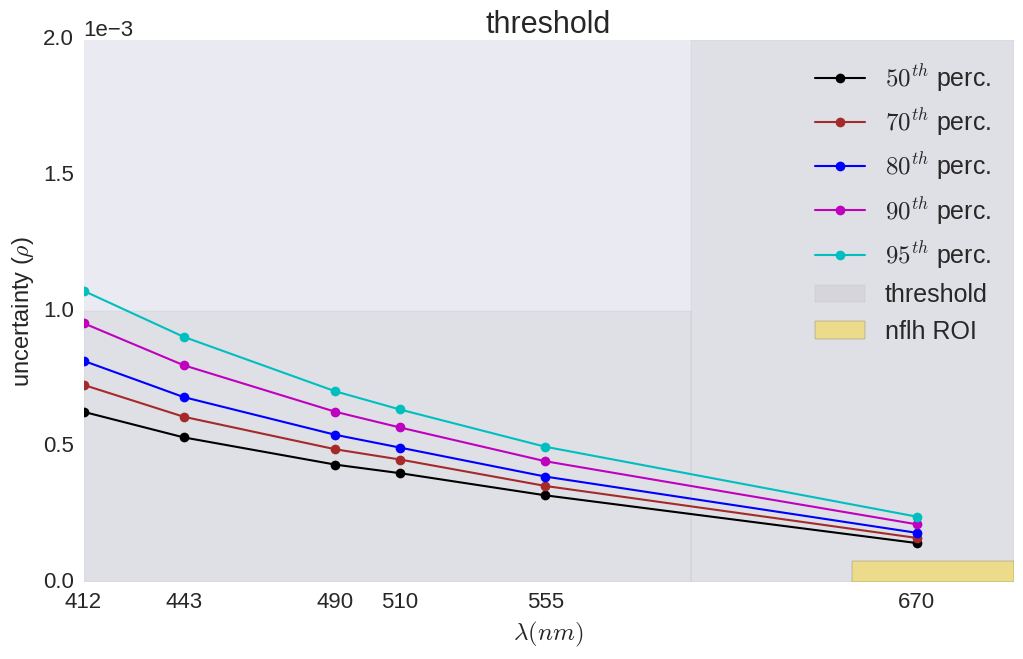

In [9]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles(df, ptiles, title=scenario, 
               savepath='PaceSNR_sim_%s_ptiles.png' % scenario)

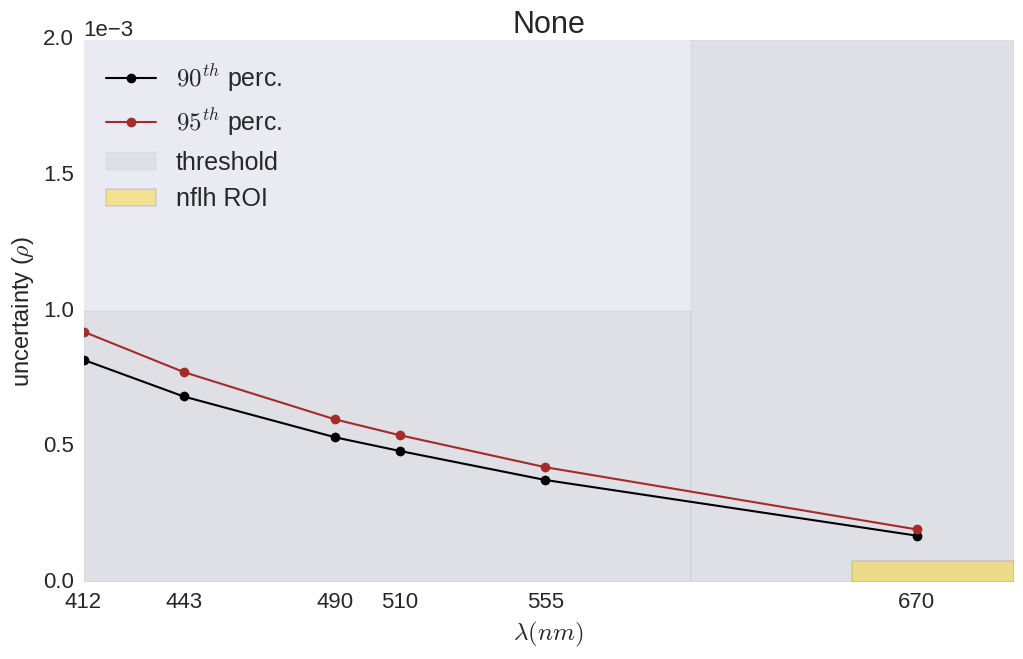

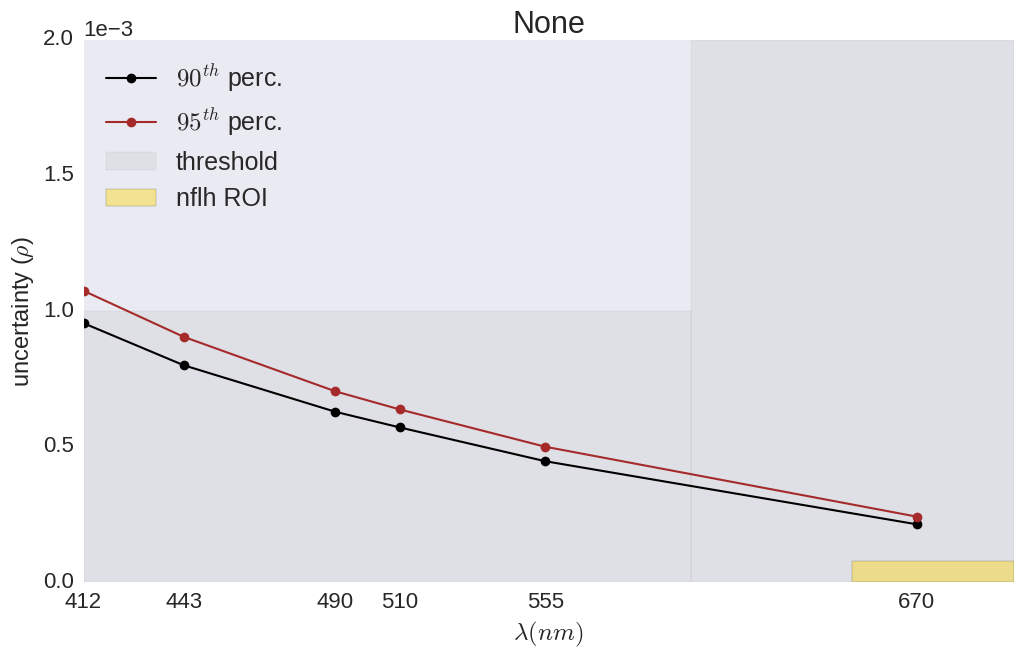

In [11]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles(df, ['90', '95'], savepath='PaceSNR_sim_%s_90_95ptiles.png' % (scenario))

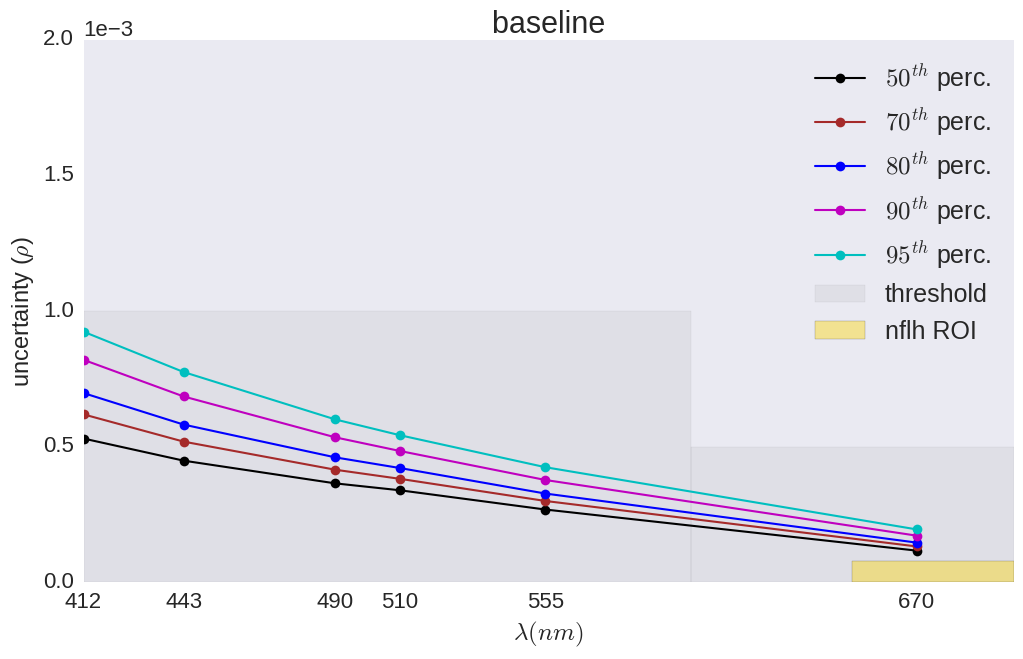

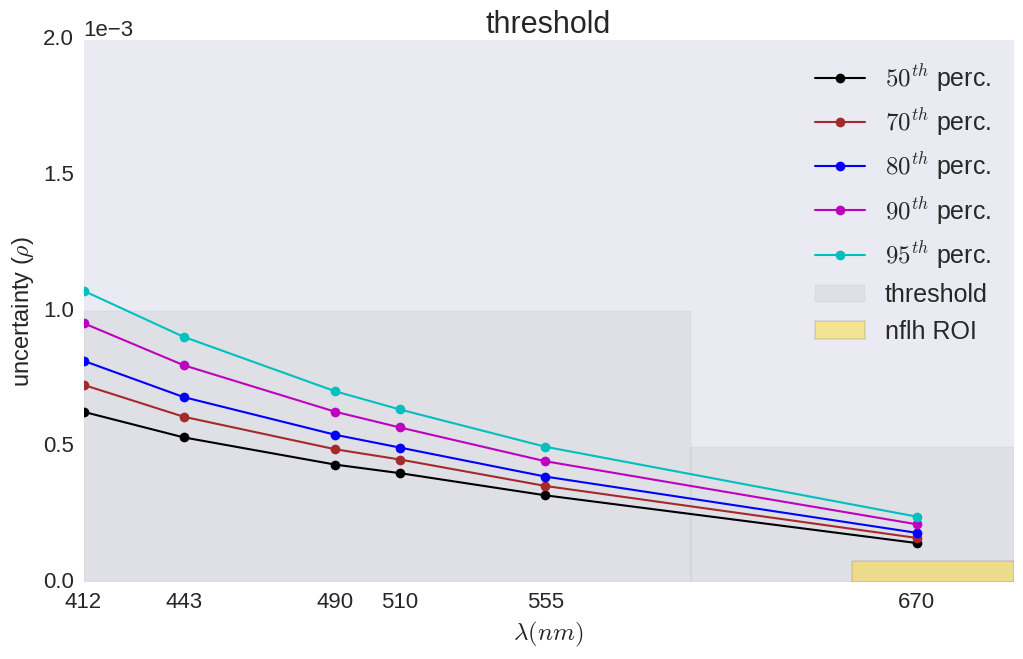

In [9]:
for scenario in SNRs:
    df = pn[scenario]
    PlotPtiles2(df, ptiles, title=scenario, 
               savepath='PaceSNR_sim_%s_ptiles.png' % scenario, axYmaxBase=1e-3,
               redThresh=5e-4)